# Week 5 Notes

## 5.1.1 Introduction to Statistical Learning

Statistical learning is the process of using data to learn about the underlying distribution of a target variable.
- supervised learning: the process of learning from data that has a known target variable
- unsupervised learning: the process of learning from data that has no target variable

Supervised learning matches inputs and outputs, whereas unsupervised learning discovers structure for inputs only.

We will learn about the basics of supervised learning in this case study. We will cover both regression (quantitative outcome) and classification problems (qualitative outcome).

Loss functions are used to quantify the quality of a model. In regression, the most common loss function is the Mean Squared Error (MSE). In classification, the most common loss function is 0-1 Loss.

Say we have a dataset and want to predict the relationship between a predictor variable $X$ and a target variable $Y$. The basics of regression involves finding an average point around a small subset of points in the dataset, and then predicting the value of $Y$ for a new point $X$.

Now say our data set has an output of just 0 and 1 (we have a classification problem now). We now want to estimate the outcome of the target variable $Y$ based on the predictor variable $X$ by finding the outcome of $Y$ with the highest probability for the given value of $X$.

## 5.1.2 Generating Example Regression Data

In [1]:
import numpy as np, scipy.stats as stats, matplotlib.pyplot as plt

# Data parameters
number_of_samples = 100
beta_0 = 5
beta_1 = 2

np.random.seed(1)  # set seed for reproducibility

x = 10 * stats.uniform.rvs(size=number_of_samples)  # generate uniform random numbers between 0 and 10
y = beta_0 + beta_1 * x + stats.norm.rvs(loc=0, scale=1, size=number_of_samples)  # generate normal random numbers with mean 0 and standard deviation 1

Text(0, 0.5, 'y')

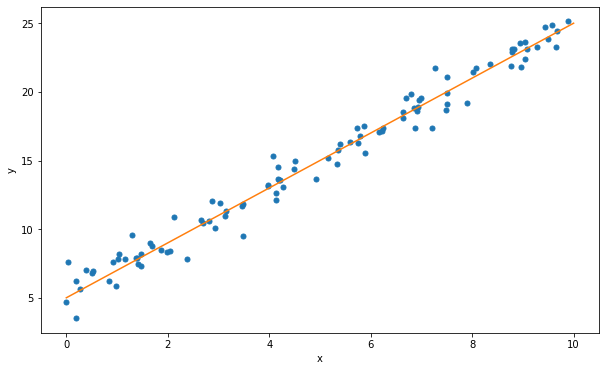

In [2]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', markersize=5)
xx = np.array([0, 10])
plt.plot(xx, beta_0 + beta_1 * xx)
plt.xlabel('x')
plt.ylabel('y')

In [3]:
print(np.mean(x), np.mean(y))  # Comprehension Check Question

4.8587792760014565 14.80142786070299


## 5.1.3 Simple Linear Regression

A simple linear regression model involves assuming the relationship between the predictor variable $X$ and the target variable $Y$ is linear; i.e. $$Y = \beta_0 + \beta_1 X + \epsilon.$$

We can use training data to estimate the parameters $\beta_0$ and $\beta_1$, and then we can predict future values of $Y$ based on  new data.

In [4]:
# Comprehension Check Question
import numpy as np
import scipy.stats as ss

n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale = 1, size = n)

def compute_rss(y_estimate, y):
    return sum(np.power(y-y_estimate, 2))
def estimate_y(x, b_0, b_1):
    return b_0 + b_1 * x
rss = compute_rss(estimate_y(x, beta_0, beta_1), y)

rss

81.540007425512

## 5.1.4 Least Square Regression in Code

Our method of regression will involve matrix calculus. We will assume we know the true value of $\beta_0$ and we are trying to find the value of $\beta_1$ that minimizes the RSS.

In [5]:
rss = []  # initialize list to store rss values
slopes = np.arange(-10, 15, 0.01)  # generate a range of slopes

In [6]:
for slope in slopes:  # compute the rss value of each slope and store it in the rss llist
    rss.append( np.sum((y - beta_0 - slope * x) ** 2) )

In [7]:
rss[0:10]  # check the first 10 values of the rss list

[465163.6265980302,
 464389.08137639664,
 463615.18165403913,
 462841.9274309581,
 462069.3187071535,
 461297.35548262496,
 460526.03775737283,
 459755.36553139694,
 458985.33880469744,
 458215.9575772741]

In [8]:
index_of_min_rss = np.argmin(rss)  # find the index of the minimum rss value
index_of_min_rss

1200

In [9]:
slopes[index_of_min_rss]  # find the slope that minimizes the rss

1.9999999999997442

Let us plot a generated slopes vs. corresponding RSS values graph.

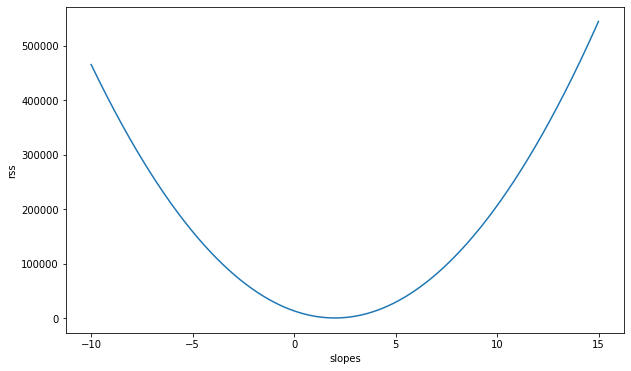

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(slopes, rss)
plt.xlabel('slopes')
plt.ylabel('rss')
plt.show()

In [11]:
## 5.1.5 Simple Linear Regression in Code

In [12]:
import statsmodels.api as sm
model = sm.OLS(y, x)
estimate = model.fit()
print(estimate.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2974.
Date:                Tue, 17 May 2022   Prob (F-statistic):                    1.14e-75
Time:                        10:15:22   Log-Likelihood:                         -246.89
No. Observations:                 100   AIC:                                      495.8
Df Residuals:                      99   BIC:                                      498.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The model generated is actually a linear model with no intercept term; that's why we have an artificially large slope value when we know the true slope to be $2$ from our specified randomly generated data.

In [13]:
model = sm.OLS(y, sm.add_constant(x))
estimate = model.fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Tue, 17 May 2022   Prob (F-statistic):           7.47e-82
Time:                        10:15:22   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0

## 5.1.6 Multiple Linear Regression

Here, we are trying to find the predicted value of a target variable $Y$ from several predictor variables $X$.

The coefficient of each predictor variable is read as the change in $Y$ with a unit change of the predictor variable keeping all other predictor variables constant.

## 5.1.7 Using scikit-learn for Linear Regression

In [14]:
import sklearn, numpy as np, scipy.stats as ss
np.random.seed(1)  # set the random seed to 1 for reproducibility

Let us generate a linear regression of a randomly generated data set.

In [15]:
n = 500  # number of data points generated in model

# set coefficients of the multiple linear regression model
beta_0 = 5
beta_1 = 2
beta_2 = -1

In [16]:
x1 = 10 * ss.uniform.rvs(size=n)  # generate x1 values
x2 = 10 * ss.uniform.rvs(size=n)  # generate x2 values
y = beta_0 + beta_1 * x1 + beta_2 * x2 + ss.norm.rvs(loc=0, scale=1, size=n)  # generate y values

We can actually stack x1 and x2 into a single matrix.

In [17]:
X = np.stack((x1, x2), axis=1)  # create the predictor matrix

Now let us plot the data points.

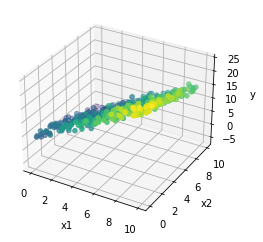

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c=y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()

Let us create the regression fit.

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression(fit_intercept=True)
lm.fit(X, y)

LinearRegression()

Let us now find some aspects of the regression fit, starting with the value of $\beta_0$.

In [21]:
lm.intercept_

5.154077763777254

Now let us find the values of $\beta_1$ and $\beta_2$.

In [22]:
lm.coef_

array([ 1.9999379 , -1.02026449])

Let us predict the value of $Y$ given a new predictor set $X =
\begin{bmatrix}
2 \\
4
\end{bmatrix}$.

In [23]:
lm.predict(np.array([2, 4]).reshape(1, -1))

array([5.07289561])

Finally, let us figure how close the regression fit is to the actual data.

In [24]:
lm.score(X, y)

0.9798997316600129

## 5.1.8 Assessing Model Accuracy

Most common way to measure regression model accuracy is the Mean Square Error (MSE).

Most common way to measure classification model accuracy is the Misclassification Rate (MCR) or Test Error Rate (TER); how often the model miscategorizes data from a test set.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)  # random state fixed for reproducibility

In [27]:
lm = LinearRegression(fit_intercept=True)

In [28]:
lm.fit(X_train, y_train)

LinearRegression()

In [29]:
lm.score(X_test, y_test)  # Test MSE

0.9794930834681773

The interesting thing to note is we want our model's accuracy to be APPROPRIATE for the data we are using; if it is too precise, we can overfit the data and cause the model to become overly sensitive to noise. However, if the model is too inaccurate, we can underfit the data and cause the model to not be able to sufficiently generalize to new data.

## 5.2.1 Generating Example Classification Data

In [30]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

<img alt="image" src="../../../../../Desktop/Screen Shot 2022-05-16 at 7.55.11 PM.png"/>

The problem set up is that we have data generated from two 2D normal distributions. We want to classify from which distribution the data points are from.

In [31]:
h = 1   # step size in the mesh
sd = 1  # standard deviation of the distributions
n = 50  # number of data points generated in model

In [32]:
def generate_data(n: int, h: float, sd1: float, sd2: float) -> tuple:
    x1 = ss.norm.rvs(-h, sd1, n) # generate x1 values
    y1 = ss.norm.rvs(0, sd1, n)  # generate y1 values

    x2 = ss.norm.rvs(h, sd2, n)  # generate x2 values
    y2 = ss.norm.rvs(0, sd2, n)  # generate y2 values

    return x1, y1, x2, y2

In [33]:
x1, y1, x2, y2 = generate_data(1000, 1.5, 1, 1.5)

In [34]:
def plot_data(x1: float, x2: float, y1: float, y2: float) -> None:
    plt.figure()
    plt.plot(x1, y1, "o", ms=2, label="Class 1")
    plt.plot(x2, y2, "o", ms=2, label="Class 2")
    plt.legend("upper right")
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

    return None

In [35]:
plot_data(x1, x2, y1, y2)

<IPython.core.display.Javascript object>

The orange cloud is bigger because it has a higher standard deviation.

In [36]:
# Comprehension Check Questions

In [37]:
x1, y1, x2, y2 = generate_data(1000, 0, 1, 1)
plot_data(x1, x2, y1, y2)

<IPython.core.display.Javascript object>

In [38]:
x1, y1, x2, y2 = generate_data(1000, 1, 2, 2.5)
plot_data(x1, x2, y1, y2)

<IPython.core.display.Javascript object>

In [39]:
x1, y1, x2, y2 = generate_data(1000, 10, 100, 100)
plot_data(x1, x2, y1, y2)

<IPython.core.display.Javascript object>

In [40]:
x1, y1, x2, y2 = generate_data(1000, 20, .5, .5)
plot_data(x1, x2, y1, y2)

<IPython.core.display.Javascript object>

## 5.2.2 Logistic Regression

It's a binary classifier. Also called conditional class probabilities.

This is a classifier that classifies data points based on conditionals on the values of the predictor variables.

The method of calculating the classifier involves finding the probability of a data point belonging to each class by using linear regression techniques and logarithms to restrict the value of probabilities to be between 0 and 1.

## 5.2.3 Logistic Regression in Code

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
X = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))
X.shape

(2000, 2)

In [43]:
n = 1000
y = np.hstack((np.repeat(1,n), np.repeat(2,n)))
y.shape

(2000,)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [45]:
clf = LogisticRegression()
clf.fit(X_train, y_train)  # Fit the model on training data

LogisticRegression()

In [46]:
clf.score(X_test, y_test)  # Evaluate the model on test data

1.0

In [47]:
clf.predict_proba(np.array([-2, 0]).reshape(1, -1))  # Probability of a new point in each class

array([[0.74019354, 0.25980646]])

In [48]:
clf.predict(np.array([-2, 0]).reshape(1, -1))  # Determining which class a new point will be allocated to

array([1])

## 5.2.4 Computing Predictive Probabilities Across the Grid

In [49]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

In [50]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");

<IPython.core.display.Javascript object>

## 5.2.1 Generating Example Classification Data

In [ ]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

<img alt="image" src="../../../../../Desktop/Screen Shot 2022-05-16 at 7.55.11 PM.png"/>

The problem set up is that we have data generated from two 2D normal distributions. We want to classify from which distribution the data points are from.

In [ ]:
h = 1   # step size in the mesh
sd = 1  # standard deviation of the distributions
n = 50  # number of data points generated in model

In [ ]:
def generate_data(n: int, h: float, sd1: float, sd2: float) -> tuple:
    x1 = ss.norm.rvs(-h, sd1, n) # generate x1 values
    y1 = ss.norm.rvs(0, sd1, n)  # generate y1 values

    x2 = ss.norm.rvs(h, sd2, n)  # generate x2 values
    y2 = ss.norm.rvs(0, sd2, n)  # generate y2 values

    return x1, y1, x2, y2

In [ ]:
x1, y1, x2, y2 = generate_data(1000, 1.5, 1, 1.5)

In [ ]:
def plot_data(x1: float, x2: float, y1: float, y2: float) -> None:
    plt.figure()
    plt.plot(x1, y1, "o", ms=2, label="Class 1")
    plt.plot(x2, y2, "o", ms=2, label="Class 2")
    plt.legend("upper right")
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

    return None

In [ ]:
plot_data(x1, x2, y1, y2)

The orange cloud is bigger because it has a higher standard deviation.

In [ ]:
# Comprehension Check Questions

In [ ]:
x1, y1, x2, y2 = generate_data(1000, 0, 1, 1)
plot_data(x1, x2, y1, y2)

In [ ]:
x1, y1, x2, y2 = generate_data(1000, 1, 2, 2.5)
plot_data(x1, x2, y1, y2)

In [ ]:
x1, y1, x2, y2 = generate_data(1000, 10, 100, 100)
plot_data(x1, x2, y1, y2)

In [ ]:
x1, y1, x2, y2 = generate_data(1000, 20, .5, .5)
plot_data(x1, x2, y1, y2)

## 5.2.2 Logistic Regression

It's a binary classifier. Also called conditional class probabilities.

This is a classifier that classifies data points based on conditionals on the values of the predictor variables.

The method of calculating the classifier involves finding the probability of a data point belonging to each class by using linear regression techniques and logarithms to restrict the value of probabilities to be between 0 and 1.

## 5.2.3 Logistic Regression in Code

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))
X.shape

In [ ]:
n = 1000
y = np.hstack((np.repeat(1,n), np.repeat(2,n)))
y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)  # Fit the model on training data

In [ ]:
clf.score(X_test, y_test)  # Evaluate the model on test data

In [ ]:
clf.predict_proba(np.array([-2, 0]).reshape(1, -1))  # Probability of a new point in each class

In [ ]:
clf.predict(np.array([-2, 0]).reshape(1, -1))  # Determining which class a new point will be allocated to

## 5.2.4 Computing Predictive Probabilities Across the Grid

In [ ]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

In [ ]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");

# 5.3.1 Tree-Based Models for Regression and Classification

We break the predictor space into smaller and smaller regions until we hit a stopping condition. For a particular test observation, we look at the region of the predictor space that is most likely to contain the test observation. For regression models, we find the mean of the outcomes in this region. For classification models, we find the mode of the outcomes in this region.

We make divisions by looking for maximally homogeneous regions of the predictor space. We keep making division until we get the lowest value of the loss function: RSS for regression and either Gini index or Cross entropy for classification.

## 5.3.2 Random Forest Predictions

A random forest prediction is made from aggregating several trees and making each tree different by bagging each data set with replacement and also constricting the predictor variables considered with each cut. We then take the mean for regression or mode for classification of the predictions from each tree.

Copy-pasted from the notes:

One of the great features of the `sklearn` library is that there is a consistent framework for the workflow needed to use different statistical models.

To do random forest regression, you use the following import:

`from sklearn.ensemble import RandomForestRegressor`

To do random forest classification, you use the following import:

`from sklearn.ensemble import RandomForestClassifier`

After importing the relevant model, everything proceeds in the same way as for linear and logistic regression as shown in the previous videos.

## 5.2.1 Generating Example Classification Data

In [ ]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

<img alt="image" src="../../../../../Desktop/Screen Shot 2022-05-16 at 7.55.11 PM.png"/>

The problem set up is that we have data generated from two 2D normal distributions. We want to classify from which distribution the data points are from.

In [ ]:
h = 1   # step size in the mesh
sd = 1  # standard deviation of the distributions
n = 50  # number of data points generated in model

In [ ]:
def generate_data(n: int, h: float, sd1: float, sd2: float) -> tuple:
    x1 = ss.norm.rvs(-h, sd1, n) # generate x1 values
    y1 = ss.norm.rvs(0, sd1, n)  # generate y1 values

    x2 = ss.norm.rvs(h, sd2, n)  # generate x2 values
    y2 = ss.norm.rvs(0, sd2, n)  # generate y2 values

    return x1, y1, x2, y2

In [ ]:
x1, y1, x2, y2 = generate_data(1000, 1.5, 1, 1.5)

In [ ]:
def plot_data(x1: float, x2: float, y1: float, y2: float) -> None:
    plt.figure()
    plt.plot(x1, y1, "o", ms=2, label="Class 1")
    plt.plot(x2, y2, "o", ms=2, label="Class 2")
    plt.legend("upper right")
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

    return None

In [ ]:
plot_data(x1, x2, y1, y2)

The orange cloud is bigger because it has a higher standard deviation.

In [ ]:
# Comprehension Check Questions

In [ ]:
x1, y1, x2, y2 = generate_data(1000, 0, 1, 1)
plot_data(x1, x2, y1, y2)

In [ ]:
x1, y1, x2, y2 = generate_data(1000, 1, 2, 2.5)
plot_data(x1, x2, y1, y2)

In [ ]:
x1, y1, x2, y2 = generate_data(1000, 10, 100, 100)
plot_data(x1, x2, y1, y2)

In [ ]:
x1, y1, x2, y2 = generate_data(1000, 20, .5, .5)
plot_data(x1, x2, y1, y2)

## 5.2.2 Logistic Regression

It's a binary classifier. Also called conditional class probabilities.

This is a classifier that classifies data points based on conditionals on the values of the predictor variables.

The method of calculating the classifier involves finding the probability of a data point belonging to each class by using linear regression techniques and logarithms to restrict the value of probabilities to be between 0 and 1.

## 5.2.3 Logistic Regression in Code

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))
X.shape

In [ ]:
n = 1000
y = np.hstack((np.repeat(1,n), np.repeat(2,n)))
y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)  # Fit the model on training data

In [ ]:
clf.score(X_test, y_test)  # Evaluate the model on test data

In [ ]:
clf.predict_proba(np.array([-2, 0]).reshape(1, -1))  # Probability of a new point in each class

In [ ]:
clf.predict(np.array([-2, 0]).reshape(1, -1))  # Determining which class a new point will be allocated to

## 5.2.4 Computing Predictive Probabilities Across the Grid

In [ ]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

In [ ]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");

# 5.3.1 Tree-Based Models for Regression and Classification

We break the predictor space into smaller and smaller regions until we hit a stopping condition. For a particular test observation, we look at the region of the predictor space that is most likely to contain the test observation. For regression models, we find the mean of the outcomes in this region. For classification models, we find the mode of the outcomes in this region.

We make divisions by looking for maximally homogeneous regions of the predictor space. We keep making division until we get the lowest value of the loss function: RSS for regression and either Gini index or Cross entropy for classification.

## 5.3.2 Random Forest Predictions

A random forest prediction is made from aggregating several trees and making each tree different by bagging each data set with replacement and also constricting the predictor variables considered with each cut. We then take the mean for regression or mode for classification of the predictions from each tree.

Copy-pasted from the notes:

One of the great features of the `sklearn` library is that there is a consistent framework for the workflow needed to use different statistical models.

To do random forest regression, you use the following import:

`from sklearn.ensemble import RandomForestRegressor`

To do random forest classification, you use the following import:

`from sklearn.ensemble import RandomForestClassifier`

After importing the relevant model, everything proceeds in the same way as for linear and logistic regression as shown in the previous videos.

## 5.2.1 Generating Example Classification Data

In [51]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

<img alt="image" src="../../../../../Desktop/Screen Shot 2022-05-16 at 7.55.11 PM.png"/>

The problem set up is that we have data generated from two 2D normal distributions. We want to classify from which distribution the data points are from.

In [52]:
h = 1   # step size in the mesh
sd = 1  # standard deviation of the distributions
n = 50  # number of data points generated in model

In [53]:
def generate_data(n: int, h: float, sd1: float, sd2: float) -> tuple:
    x1 = ss.norm.rvs(-h, sd1, n) # generate x1 values
    y1 = ss.norm.rvs(0, sd1, n)  # generate y1 values

    x2 = ss.norm.rvs(h, sd2, n)  # generate x2 values
    y2 = ss.norm.rvs(0, sd2, n)  # generate y2 values

    return x1, y1, x2, y2

In [54]:
x1, y1, x2, y2 = generate_data(1000, 1.5, 1, 1.5)

In [55]:
def plot_data(x1: float, x2: float, y1: float, y2: float) -> None:
    plt.figure()
    plt.plot(x1, y1, "o", ms=2, label="Class 1")
    plt.plot(x2, y2, "o", ms=2, label="Class 2")
    plt.legend("upper right")
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

    return None

In [56]:
plot_data(x1, x2, y1, y2)

<IPython.core.display.Javascript object>

The orange cloud is bigger because it has a higher standard deviation.

In [57]:
# Comprehension Check Questions

In [58]:
x1, y1, x2, y2 = generate_data(1000, 0, 1, 1)
plot_data(x1, x2, y1, y2)

<IPython.core.display.Javascript object>

In [59]:
x1, y1, x2, y2 = generate_data(1000, 1, 2, 2.5)
plot_data(x1, x2, y1, y2)

<IPython.core.display.Javascript object>

In [60]:
x1, y1, x2, y2 = generate_data(1000, 10, 100, 100)
plot_data(x1, x2, y1, y2)

<IPython.core.display.Javascript object>

In [61]:
x1, y1, x2, y2 = generate_data(1000, 20, .5, .5)
plot_data(x1, x2, y1, y2)

<IPython.core.display.Javascript object>

## 5.2.2 Logistic Regression

It's a binary classifier. Also called conditional class probabilities.

This is a classifier that classifies data points based on conditionals on the values of the predictor variables.

The method of calculating the classifier involves finding the probability of a data point belonging to each class by using linear regression techniques and logarithms to restrict the value of probabilities to be between 0 and 1.

## 5.2.3 Logistic Regression in Code

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
X = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))
X.shape

(2000, 2)

In [64]:
n = 1000
y = np.hstack((np.repeat(1,n), np.repeat(2,n)))
y.shape

(2000,)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [66]:
clf = LogisticRegression()
clf.fit(X_train, y_train)  # Fit the model on training data

LogisticRegression()

In [67]:
clf.score(X_test, y_test)  # Evaluate the model on test data

1.0

In [68]:
clf.predict_proba(np.array([-2, 0]).reshape(1, -1))  # Probability of a new point in each class

array([[0.7409387, 0.2590613]])

In [69]:
clf.predict(np.array([-2, 0]).reshape(1, -1))  # Determining which class a new point will be allocated to

array([1])

## 5.2.4 Computing Predictive Probabilities Across the Grid

In [70]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

In [72]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");

<IPython.core.display.Javascript object>

# 5.3.1 Tree-Based Models for Regression and Classification

We break the predictor space into smaller and smaller regions until we hit a stopping condition. For a particular test observation, we look at the region of the predictor space that is most likely to contain the test observation. For regression models, we find the mean of the outcomes in this region. For classification models, we find the mode of the outcomes in this region.

We make divisions by looking for maximally homogeneous regions of the predictor space. We keep making division until we get the lowest value of the loss function: RSS for regression and either Gini index or Cross entropy for classification.

## 5.3.2 Random Forest Predictions

A random forest prediction is made from aggregating several trees and making each tree different by bagging each data set with replacement and also constricting the predictor variables considered with each cut. We then take the mean for regression or mode for classification of the predictions from each tree.

Copy-pasted from the notes:

One of the great features of the `sklearn` library is that there is a consistent framework for the workflow needed to use different statistical models.

To do random forest regression, you use the following import:

`from sklearn.ensemble import RandomForestRegressor`

To do random forest classification, you use the following import:

`from sklearn.ensemble import RandomForestClassifier`

After importing the relevant model, everything proceeds in the same way as for linear and logistic regression as shown in the previous videos.